# PROJECT DESCRIPTION

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins

IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [2]:
df=pd.read_csv("Baseball_Case_Study.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


describing the columns

R->Runs.
AB->At Bats.
H->Hit Doubles.
SO-> Strike Out.
SB->Stolen Bases.
RA->Runs Allowed.
ER->Earned Runs.
ERA->Earned Run Average.
SHO->Shout Outs.
SV->Save.
E->Error.
2B->Doubles.
3B->Triples.
HR->Home Runs
BB->Walks.
W->no. of wins.

In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


The dataset consists of 16 columns including the target column 'W' and 30 Rows.

In [5]:
#checking data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

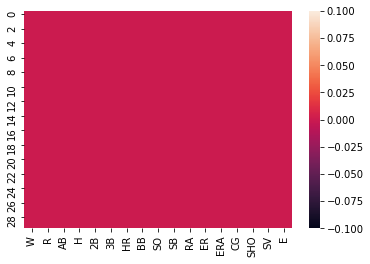

In [7]:
#Checking null values using heatmap
sns.heatmap(df.isnull())

SO the dataset doesn't contain any null values.

# DATA VISUALIZATION USING GRAPH PLOTS

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

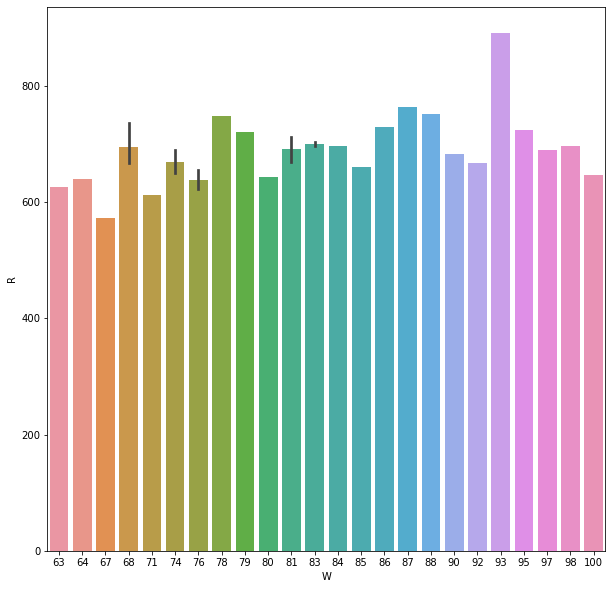

In [9]:
#Wins v/s Runs
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="R",data=df)

From the graph it is understood that it has assymetric trend.

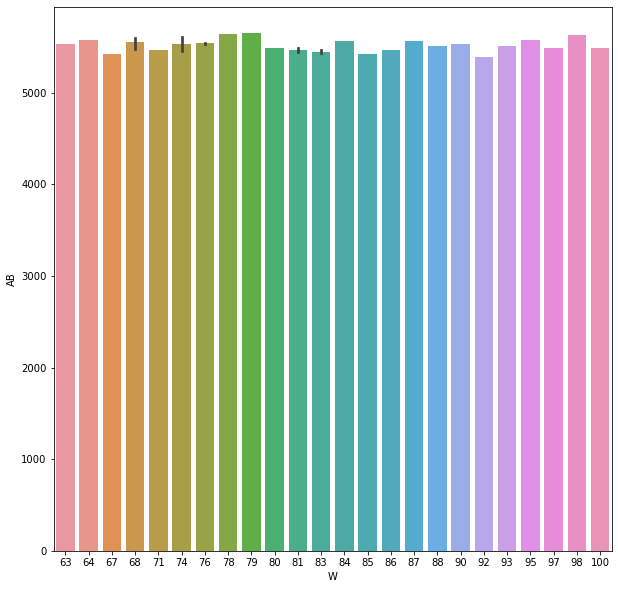

In [10]:
#Wins v/s At BAts
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="AB",data=df)

The graph doesn't give any clear picture it is just a vertical line against the wins

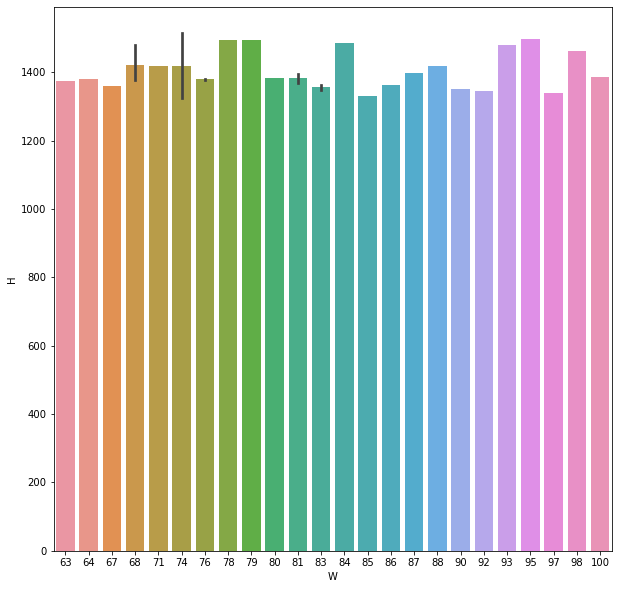

In [11]:
#Wins v/s At Hit Doubles
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="H",data=df)

The graph doesn't give any clear picture it is just a vertical line against the wins

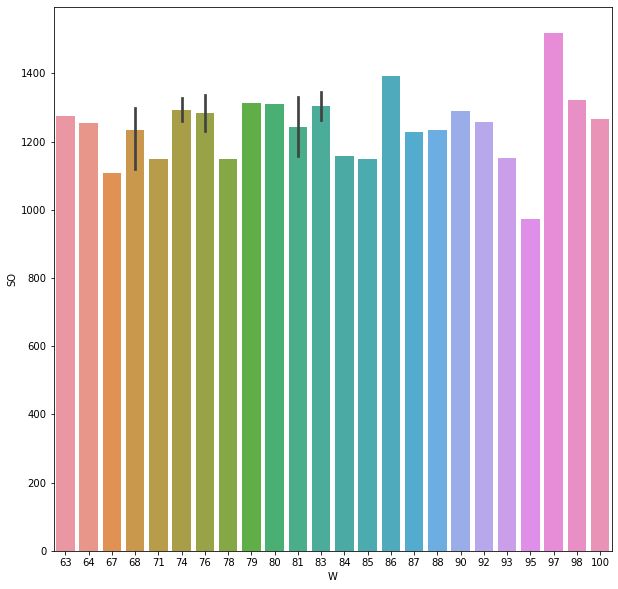

In [13]:
#Wins v/s Strike Out
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="SO",data=df)

There is an increasing and decreasing trend

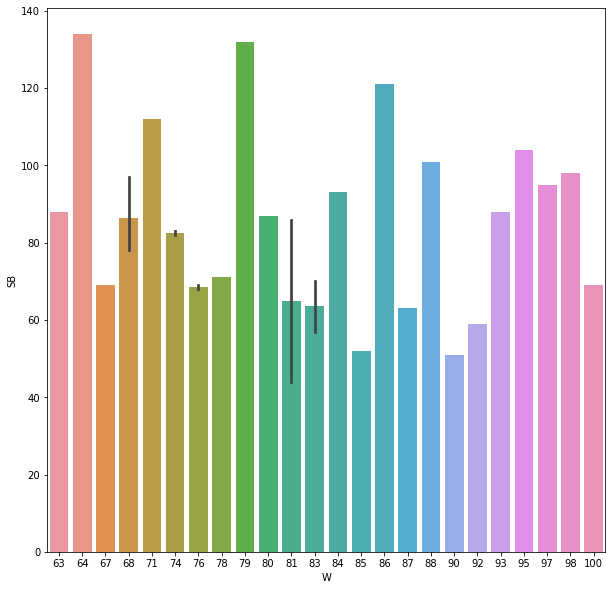

In [14]:
#Wins v/s Stolen Bases
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="SB",data=df)

There are mostly decreasing trend.

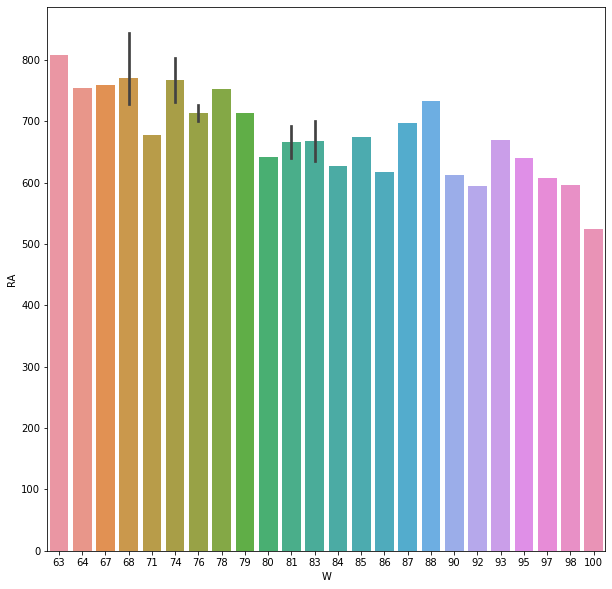

In [15]:
#Wins v/s Runs Allowed
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="RA",data=df)

there is an decreasing trend

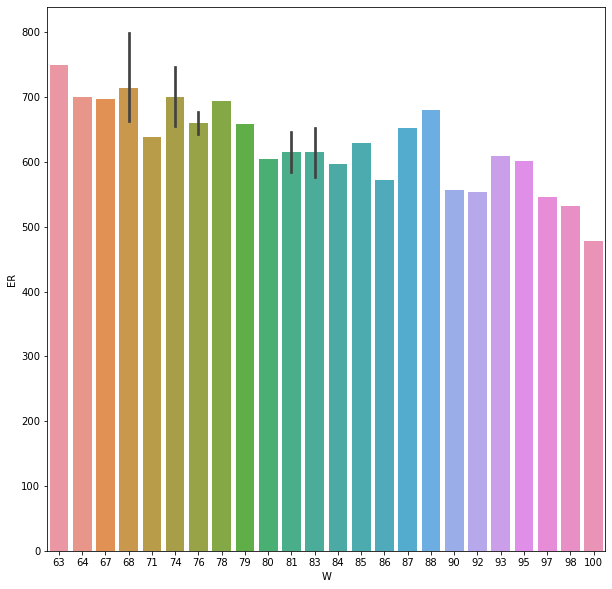

In [17]:
#Wins v/s Earned Runs
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="ER",data=df)

There is an decreasing trend

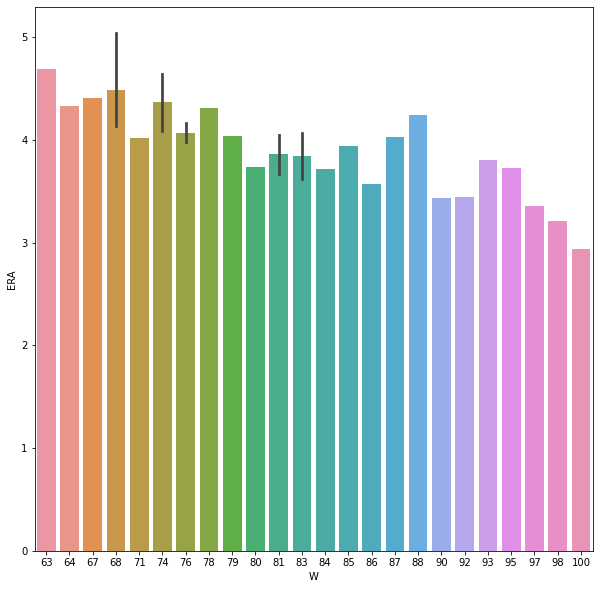

In [18]:
#Wins v/s Earned Run Average
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="ERA",data=df)

There is an decreasing trend

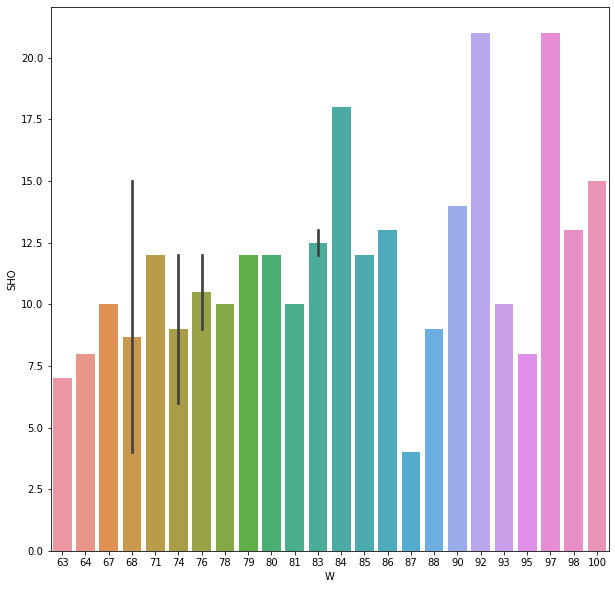

In [19]:
#Wins v/s Shout Outs
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="SHO",data=df)

There are mostly increasing trend but some decreasing trend as well

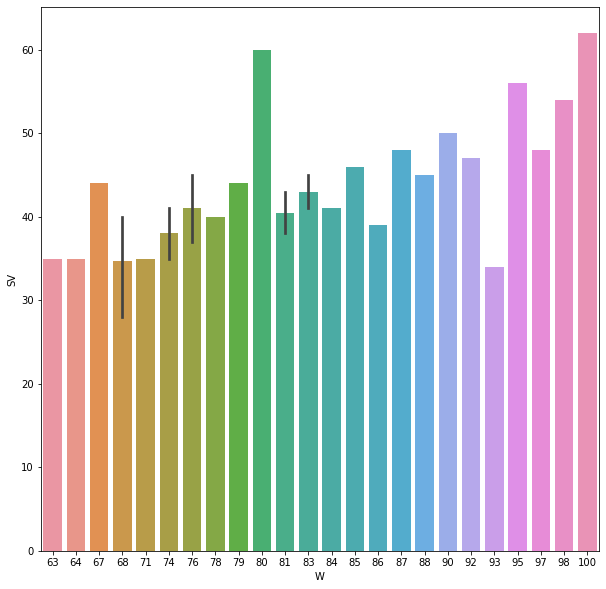

In [21]:
#Wins v/s Saves
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="SV",data=df)

We can say somewhat increasing trend

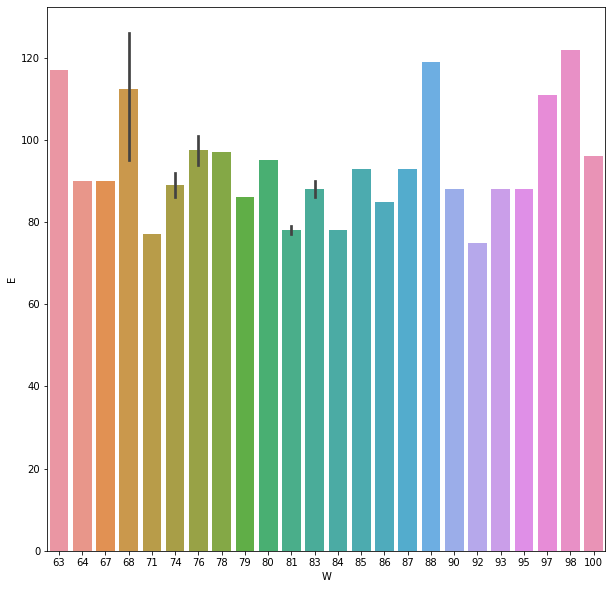

In [22]:
#Wins v/s Error
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="E",data=df)

there is assymetric relation

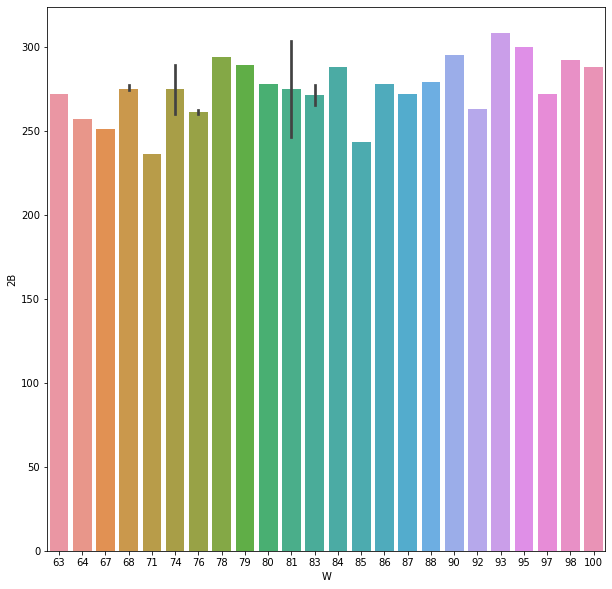

In [23]:
#Wins v/s Doubles
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="2B",data=df)

there is assymetric relation

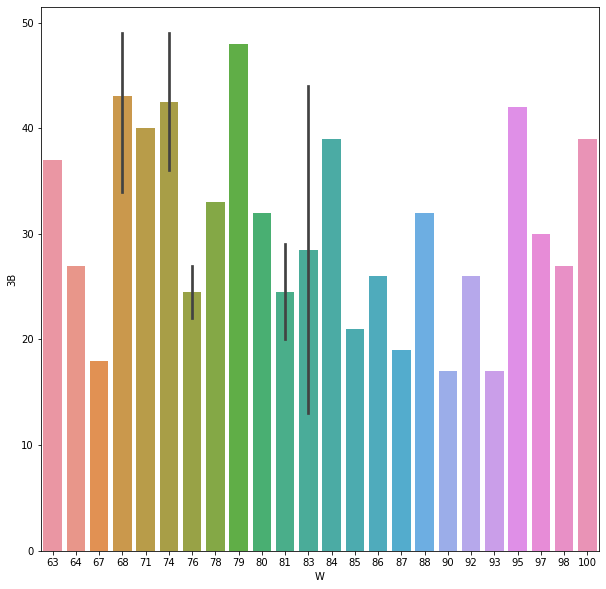

In [24]:
#Wins v/s Triples
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="3B",data=df)

there is increasing and decreasing trend

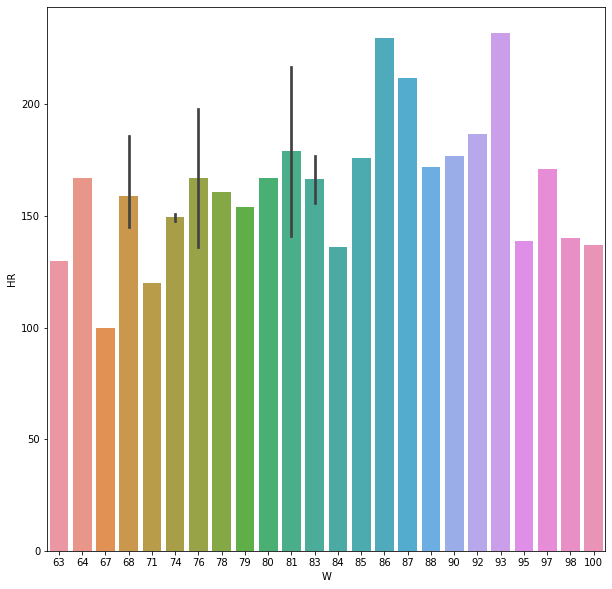

In [25]:
#Wins v/s Homeruns
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="HR",data=df)

Assymetric relationship

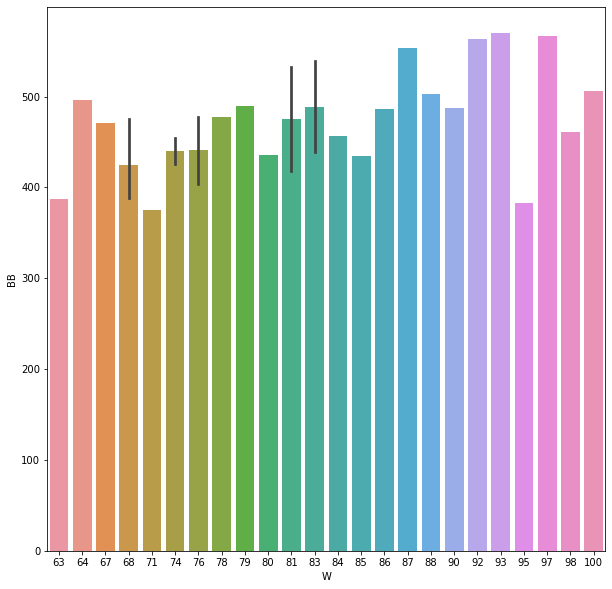

In [26]:
#Wins v/s Walks
plt.figure(figsize=(10,10))
sns.barplot(x='W',y="BB",data=df)

Increasing trend

# CHECKING COLLINEARITY

In [27]:
corr_mat=df.corr() #multivariate analysis
corr_mat

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


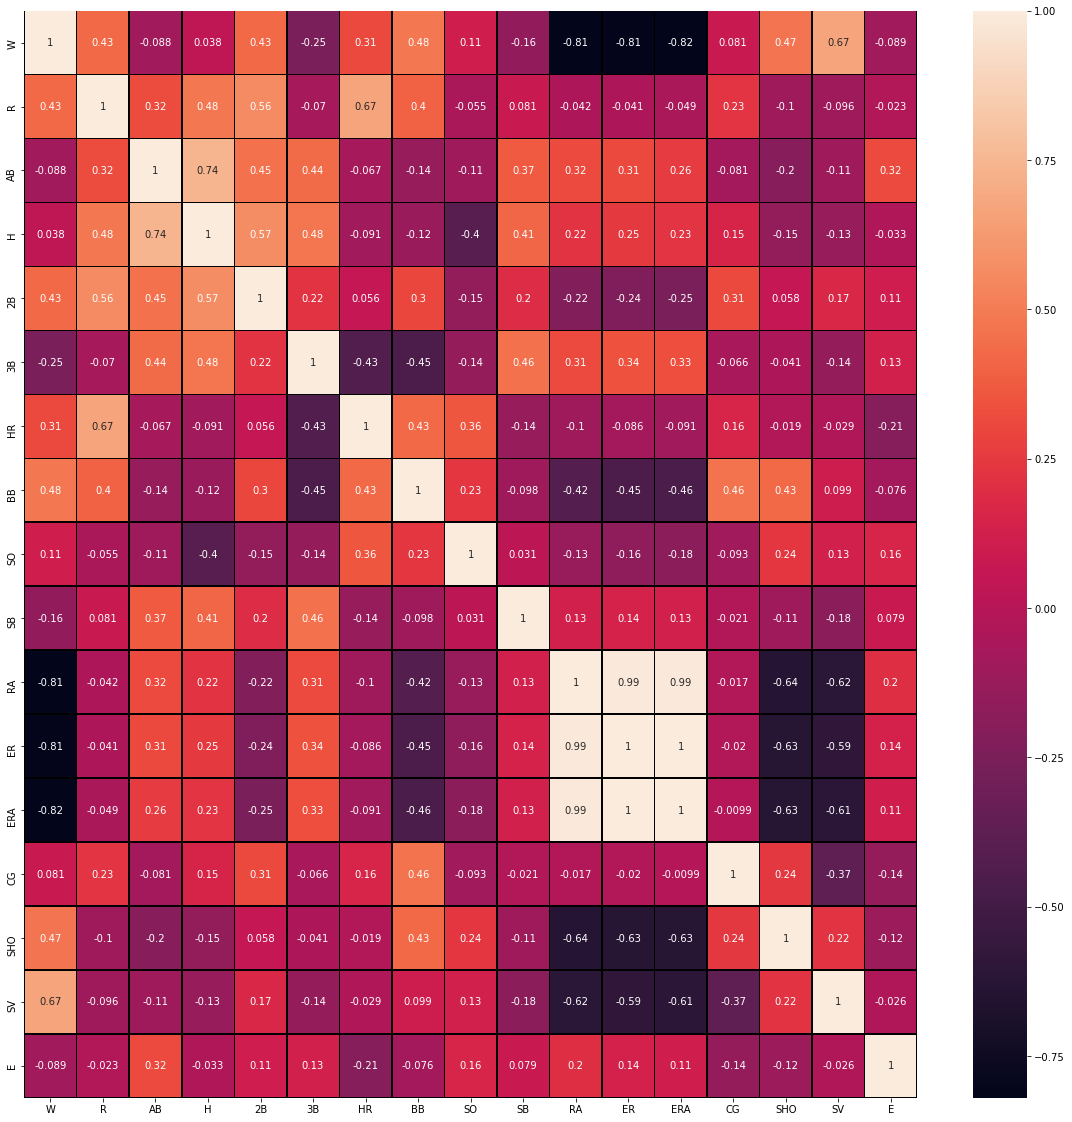

In [28]:
#checking correlation using heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black")

As we can see only columns SV & SHO is having strong relations with the target variable. But this cannot be the parameter to drop other columns

In [29]:
#statistical summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The data contains some skewness

# Trying to find the distribution

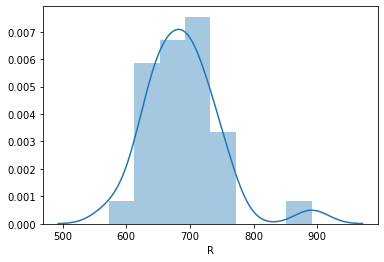

In [31]:
sns.distplot(df['R'])

There are two symmetric distribution in this column.

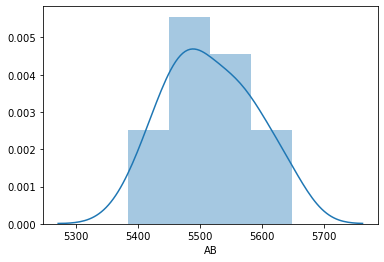

In [32]:
sns.distplot(df['AB'])

Less Skewness in this column.

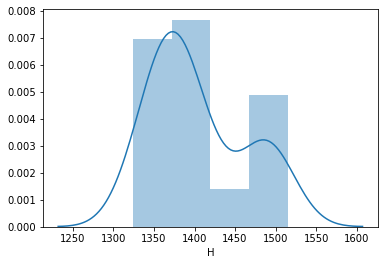

In [33]:
sns.distplot(df['H'])

Skewness is there

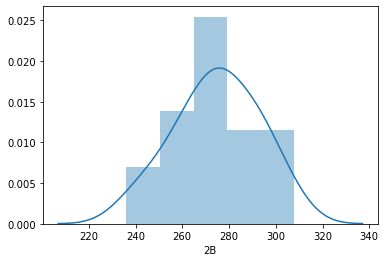

In [34]:
sns.distplot(df['2B'])

I t is normally distributed

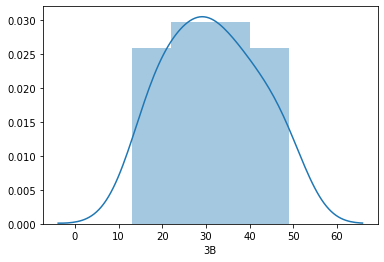

In [35]:
sns.distplot(df['3B'])

Data is normally distributed

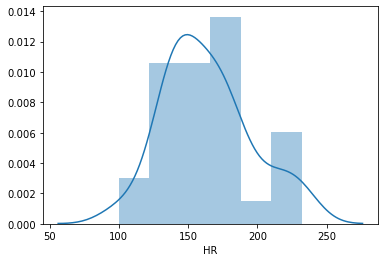

In [36]:
sns.distplot(df['HR'])

there is skewness in this column

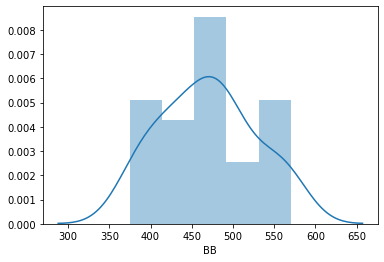

In [37]:
sns.distplot(df['BB'])

the data is normally distributed i.e within the skewness limit

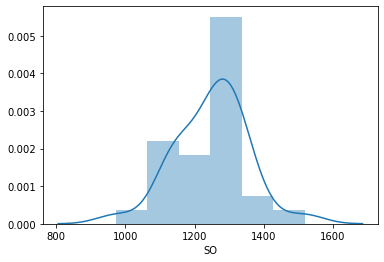

In [38]:
sns.distplot(df['SO'])

there is skewness in the dta.

# CHECKING OUTLIERS

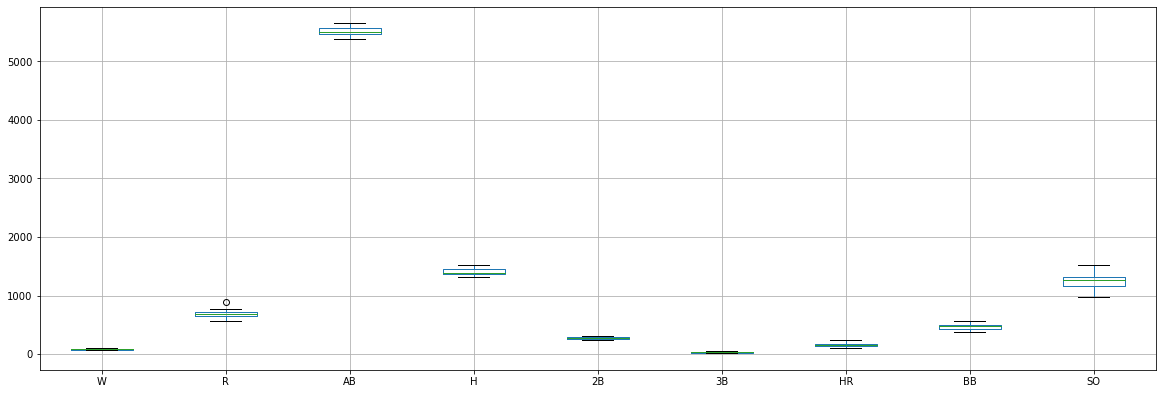

In [39]:
#checking outliers
df.iloc[:,0:9].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

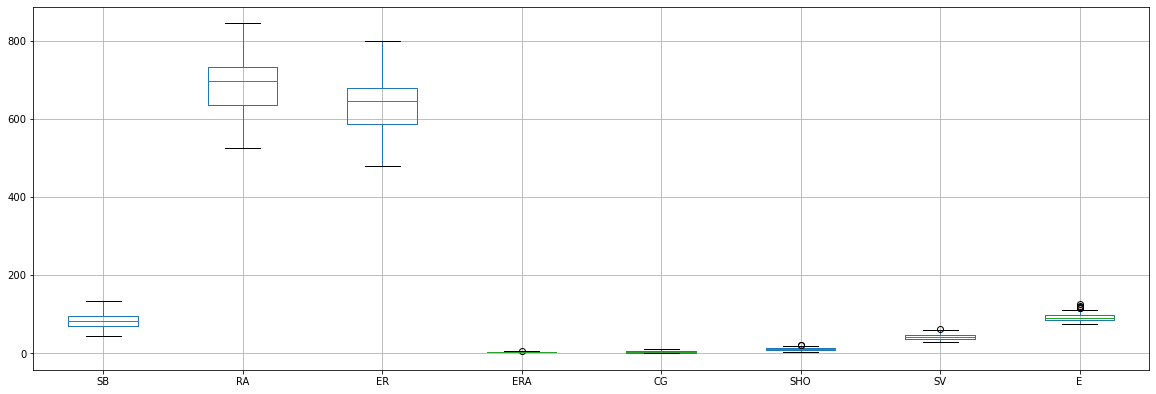

In [40]:
df.iloc[:,9:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# there are some outliers in column E but as the dataset contains only 30 rows removing outliers will lead loss of data that we don't want

# DATA DISTRIBUTION AMONG ALL THE COLUMNS MULTI VARIATE ANALYSIS

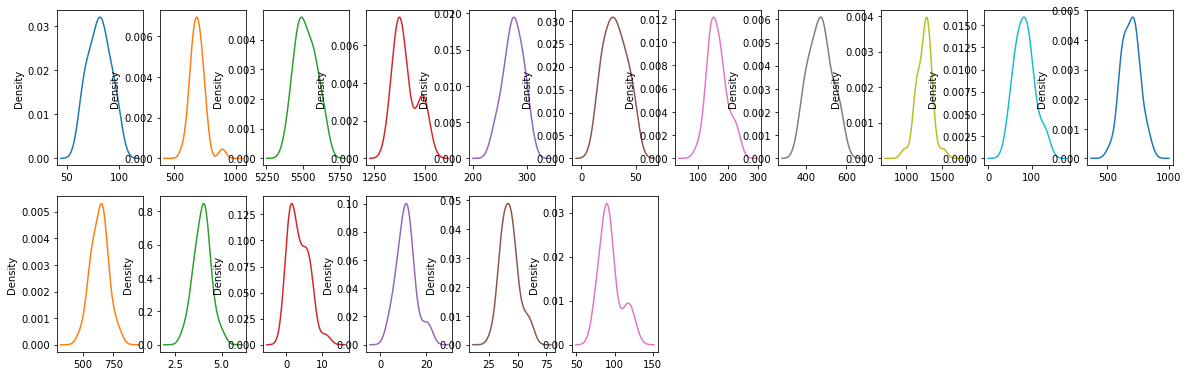

In [41]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,figsize=(20,20))
plt.show()

# Checking the correlation with the target variable

In [42]:
corr_matrix=df.corr()
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

# Let's try for outlier removal

In [43]:
z=np.abs(zscore(df))
z.shape

(30, 17)

In [44]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [45]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [46]:
loss_percentage=(30-29)/30*100
print(loss_percentage)

3.3333333333333335


As loss percentage is very low we can remove the outlier i.e array[5]

# SPLITTING THE DATASET

In [50]:
x=df_new.drop('W',axis=1)
y=df_new['W']

In [51]:
#checking skewness....no problem if we do it after splitting because correcting skewness won't delete any rows
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We can see skewness in the dataset, we will remove the skewness using power_transform function

# REMOVING SKEWNESS

In [52]:
from sklearn.preprocessing import power_transform

In [85]:
df_new1=power_transform(x)
df_new1=pd.DataFrame(df_new1,columns=x.columns)

In [86]:
df_new1.skew()

R     -0.017828
AB     0.000000
H      0.000000
2B    -0.011082
3B    -0.020462
HR    -0.054113
BB     0.019270
SO     0.102713
SB     0.008213
RA     0.011377
ER     0.041479
ERA    0.048097
CG    -0.006996
SHO    0.032659
SV    -0.033949
E     -0.015812
dtype: float64

In [55]:
x=df_new1#saving the data in new variable

In [56]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


# MODEL TRAINING

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Finding Best Random State 

In [63]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    RMS=r2_score(y_test,predlr)
    if RMS>maxAccu:
        maxAccu=RMS
        maxRS=i
print("Best R2 Score is: ",maxAccu,"on Random_state: ",maxRS)

Best R2 Score is:  0.9337130346280046 on Random_state:  476


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=476)

In [65]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print("r2 score: ",r2_score(y_test,pred))
    print("Error:")
    print("Mean_Absolute_Error: ",mean_absolute_error(y_test,pred))
    print("Mean_Squared_Error: ",mean_squared_error(y_test,pred))
    print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,pred)))

In [66]:
eval(LinearRegression())

r2 score:  0.9337130346280046
Error:
Mean_Absolute_Error:  2.7875964585679562
Mean_Squared_Error:  11.209862366241886
Root_Mean_Squared_Error:  3.3481132546916457


In [67]:
eval(DecisionTreeRegressor())

r2 score:  0.7063074901445466
Error:
Mean_Absolute_Error:  6.111111111111111
Mean_Squared_Error:  49.666666666666664
Root_Mean_Squared_Error:  7.047458170621991


In [68]:
eval(RandomForestRegressor())

r2 score:  0.5974544021024967
Error:
Mean_Absolute_Error:  6.706666666666667
Mean_Squared_Error:  68.07493333333335
Root_Mean_Squared_Error:  8.250753500943617


In [69]:
eval(SVR())

r2 score:  0.08490662466384002
Error:
Mean_Absolute_Error:  11.438243431075103
Mean_Squared_Error:  154.75245747351505
Root_Mean_Squared_Error:  12.439954078432727


# Cross Validation

In [70]:
scr=cross_val_score(LinearRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR 0.37613241212369364


In [71]:
scr=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print("scr for DTR",scr.mean())

scr for DTR -2.208265479404498


In [72]:
scr=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print("scr for RFR",scr.mean())

scr for RFR -0.4510700318945668


In [73]:
scr=cross_val_score(SVR(),x,y,cv=5)
print("scr for SVM",scr.mean())

scr for SVM -0.2935297615118614


In [74]:
#calculating differencec between accuracy score and cv score
LR1=(.9337-.3761)*100
DTR1=(.7063+2.208)*100
RFR1=(.5974+.4510)*100
SVR1=(.0849+.2935)*100

In [75]:
LR1

55.76

In [76]:
DTR1

291.43

In [77]:
RFR1

104.84

In [78]:
SVR1

37.839999999999996

# HYPERPARAMETER TUNING

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
#parameters for SVR()
parameters={'C': [0.1,1,10,100,1000],
           'kernel':['poly','rbf','sigmoid']}

In [81]:
GCV_SVR=GridSearchCV(SVR(),parameters,cv=5)
GCV_SVR.fit(x_train,y_train)
GCV_SVR.best_params_

{'C': 10, 'kernel': 'sigmoid'}

In [82]:
SVR_mod=SVR(kernel='sigmoid',C=10)
SVR_mod.fit(x_train,y_train)
pred=SVR_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

78.90048895047464


Hyperparameter tuning increases the r2 score which means the model is performing satisfactorily

# Model Saving

In [83]:
import joblib
joblib.dump(SVR_mod,"Baseball_Case_Study_Final_Result.pkl")

['Baseball_Case_Study_Final_Result.pkl']